<a href="https://colab.research.google.com/github/aksnd/kaggle_dacon_projects/blob/main/pytorch_image_classification_cactus_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jihunpark22","key":"62191e2357bbcb1dcb31bd5930072b76"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19558        393  0.9411765        
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1652         35  1.0              
m1relly/heart-attack-prediction                             Heart Attack Prediction                        519KB  2024-04-01 18:17:52            912         24  1.0              
jatinthakur706/most-watched-netflix-original-shows-tv-time  Most watched Netflix original shows (TV Time)

In [ ]:
! kaggle competitions download -c 'aerial-cactus-identification'

 42% 5.00M/12.0M [00:00<00:00, 31.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 59.5MB/s]


In [ ]:
! mkdir aerial-cacuts

In [ ]:
! unzip aerial-cactus-identification.zip -d aerial-cacuts

Archive:  aerial-cactus-identification.zip
  inflating: aerial-cacuts/sample_submission.csv  
  inflating: aerial-cacuts/test.zip  
  inflating: aerial-cacuts/train.csv  
  inflating: aerial-cacuts/train.zip  


In [ ]:
import pandas as pd

data_path = '/content/aerial-cacuts/'

labels = pd.read_csv(data_path+'train.csv')
submission = pd.read_csv(data_path +'sample_submission.csv')

In [13]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [14]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


has_cactus
1    13136
0     4364
Name: count, dtype: int64


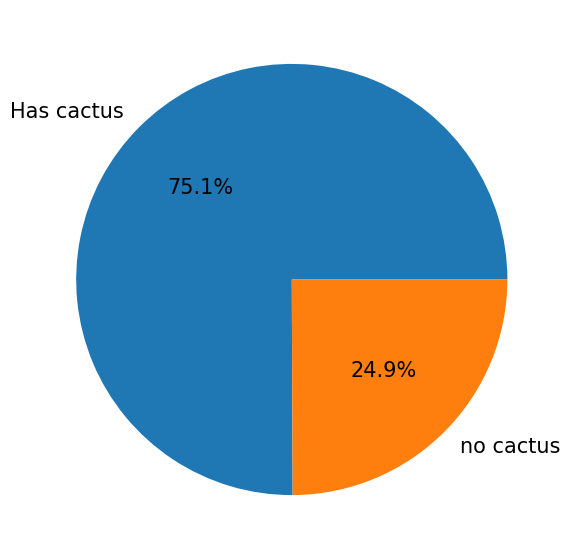

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))
label = ['Has cactus','no cactus']
plt.pie(labels['has_cactus'].value_counts(),labels=label,autopct='%.1f%%')
print(labels['has_cactus'].value_counts())

In [16]:
import zipfile

work_path = '/content/aerial-cacuts/working'
# Specify the path to the zip file
zip_file_path_test = data_path + 'test.zip'
zip_file_path_train = data_path + 'train.zip'
# Specify the directory where you want to extract the contents
extract_to_dir_test = work_path
extract_to_dir_train = work_path

# Open the zip file
with zipfile.ZipFile(zip_file_path_test, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir_test)

with zipfile.ZipFile(zip_file_path_train, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir_train)

print("Extraction completed successfully.")

Extraction completed successfully.


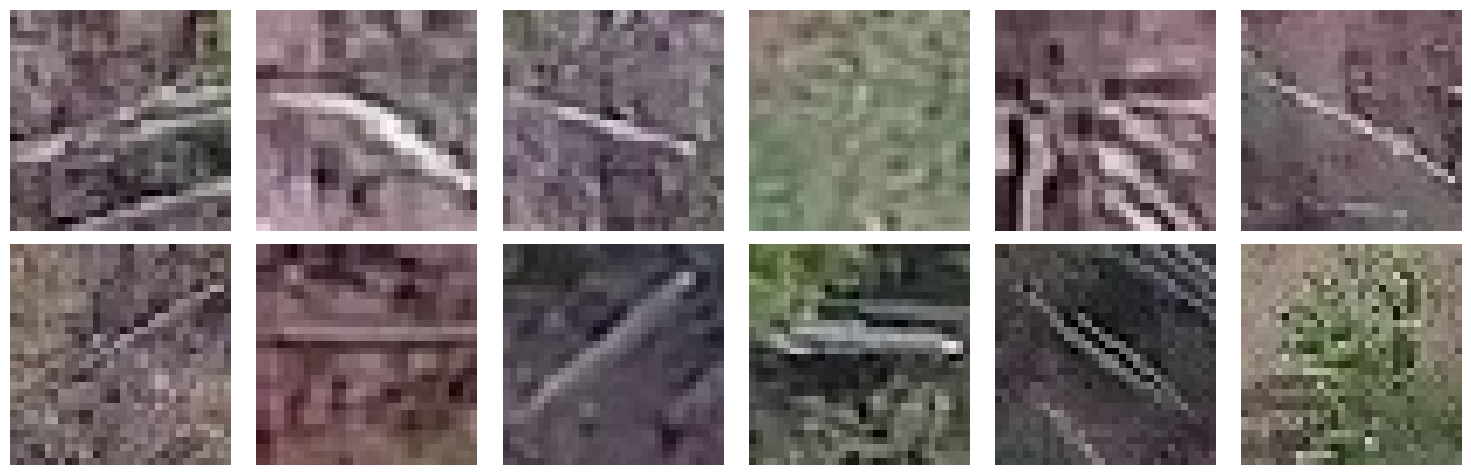

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the directory path
directory = work_path+ '/test'

# Get a list of all files in the directory
files = os.listdir(directory)

# Filter out only the image files
image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Limit to only 12 images
image_files = image_files[:12]

# Create a figure for the grid of images
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

# Loop through each image file and display it in the grid
for i, image_file in enumerate(image_files):
    # Construct the full path to the image file
    image_path = os.path.join(directory, image_file)

    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        print("Error: Unable to read the image at", image_path)
    else:
        # Display the image using imshow
        ax = axes[i//6, i%6]  # Calculate the position in the grid
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')  # Hide axis

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
image.shape

(32, 32, 3)

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train,valid = train_test_split(labels, test_size=0.2,stratify= labels['has_cactus'], random_state=42)

In [23]:
print(valid)

                                         id  has_cactus
5325   4c5662d48492b90eb0c35b0e49bbbb19.jpg           0
928    0d4d5581a90882e05b4ca123abc3a18f.jpg           1
14610  d48c4da4e7081bde2fb4613d8bc217c9.jpg           1
1466   14a836fdd1d58287cc3e976b59ae7fcc.jpg           0
6933   63f767869e83490e0948ea0028bb71a9.jpg           1
...                                     ...         ...
11762  aa4889812368a82ce99f04fb9c11a3f5.jpg           1
12564  b6495bbc097c631187bb149daab16037.jpg           1
17168  fb2036b4ce71d56fdf56d4df27f08fd9.jpg           0
5561   5037846b72adddac5b53e272a058f930.jpg           1
10629  9956df85879d3e01b79f511b23a07d9b.jpg           1

[3500 rows x 2 columns]


In [24]:
import cv2
from torch.utils.data import Dataset
class ImageDataset(Dataset):
    def __init__(self, df, image_paths, transform=None): #df는 train 혹은 valid 즉 dataframe imagepaths는 기초 image_paths로 image들이 들어있는 폴더
        self.df = df
        self.image_paths = image_paths
        self.transform = transform

    def __getitem__(self, index):
        image_id = self.df.iloc[index, 0]
        image_path = self.image_paths + image_id
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.df.iloc[index, 1]

        if self.transform is not None:
          image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.df)

In [25]:
from torchvision import transforms

transform = transforms.ToTensor()

In [50]:
dataset_train = ImageDataset(df=train, image_paths = '/content/aerial-cacuts/working/train/',transform = transform)
dataset_valid = ImageDataset(df=valid, image_paths = '/content/aerial-cacuts/working/train/',transform = transform)

In [51]:
from torch.utils.data import Dataset, DataLoader

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=32, shuffle=True)

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)  # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with 2x2 kernel and stride 2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)  # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 16 channels after pooling, 5x5 spatial dimensions, 120 output features
        self.fc2 = nn.Linear(120, 84)  # 120 input features, 84 output features
        self.fc3 = nn.Linear(84, 2)  # 84 input features, 2 output features (binary classification)

    def forward(self, x):
        # Input shape: (batch_size, 3, 32, 32)
        x = self.pool(F.relu(self.conv1(x)))  # Output shape: (batch_size, 6, 14, 14)
        x = self.pool(F.relu(self.conv2(x)))  # Output shape: (batch_size, 16, 5, 5)
        x = x.view(-1, 16 * 5 * 5)  # Flatten the input tensor
        x = F.relu(self.fc1(x))  # Output shape: (batch_size, 120)
        x = F.relu(self.fc2(x))  # Output shape: (batch_size, 84)
        x = self.fc3(x)  # Output shape: (batch_size, 2)
        return x


# Example usage:
# Create an instance of the model and move it to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# Print the model architecture
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [54]:

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in dataloader_train:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader_train)}")

print('Finished Training')

Epoch [1/10], Loss: 0.5482974870972437
Epoch [2/10], Loss: 0.3986103423620196
Epoch [3/10], Loss: 0.2961154178839568
Epoch [4/10], Loss: 0.2564002154947824
Epoch [5/10], Loss: 0.20842959514933906
Epoch [6/10], Loss: 0.15799739101229737
Epoch [7/10], Loss: 0.1367924271244981
Epoch [8/10], Loss: 0.11806237729495928
Epoch [9/10], Loss: 0.09387561317839443
Epoch [10/10], Loss: 0.08291131180294334
Finished Training


In [56]:
from sklearn.metrics import roc_auc_score

true_list = []
preds_list = []

model.eval()

with torch.no_grad():
  for images, labels in dataloader_valid:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    preds = outputs[:,1]
    true = labels.cpu()
    preds_list.extend(preds)
    true_list.extend(true)

  print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list,preds_list)}')

검증 데이터 ROC AUC : 0.9935252516928138


In [60]:
dataset_test = ImageDataset(df=submission, image_paths = '/content/aerial-cacuts/working/test/',transform = transform)
loader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)

In [63]:
model.eval()

preds_list = []
with torch.no_grad():
  for images, _ in loader_test:
    images = images.to(device)

    outputs = model(images)
    preds = outputs[:,1].tolist()
    preds_list.extend(preds)


In [64]:
submission['has_cactus'] = preds_list
submission.to_csv('submission.csv',index=False)